<a href="https://colab.research.google.com/github/Hrit-Saha/CODESOFT/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

▶ TASK-5: CREDIT CARD FRAUD DETECTION

| Author: Hrit Saha
| Batch: June
| Domain: Data Science

# Credit Card Fraud Detection

## Dataset Desciption:
`Source`: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

###**Context**
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Import visualisation libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Import the dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

## Getting the basic information

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

`note`: From the above class it can be note that the model is unbalanced since the more than 99% is legit transaction and only 1% is fraudant transaction.

# separating the data for analysis

In [ ]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


# Under-Sampling

Building a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

In [ ]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [ ]:
new_data = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
253971,156519.0,1.663004,-0.121799,-3.255648,0.789402,0.767186,-1.463062,0.767526,-0.382711,0.303603,...,-0.016484,-0.459281,-0.129537,0.426037,0.010451,0.647531,-0.115714,0.040188,225.00,0
82430,59399.0,1.339743,0.763350,-0.785458,0.965442,0.872572,-0.353325,0.390832,-0.258304,-0.261573,...,-0.123057,-0.187199,-0.314139,-1.075527,0.939894,-0.246862,0.041975,0.040972,1.00,0
188475,127990.0,-1.657603,1.155839,-3.023358,-0.427548,0.930045,-0.238899,1.393751,0.356597,-0.434312,...,0.585267,2.076620,0.179602,-0.909889,-1.381740,0.372593,-0.765798,-0.247672,82.91,0
27914,34766.0,0.797292,-1.637289,-0.678847,-0.486969,-0.672164,-0.057920,0.005964,-0.134186,-0.590619,...,0.313029,0.192742,-0.520109,-0.725636,0.671419,-0.015286,-0.063315,0.047736,343.52,0
158799,111773.0,-0.306512,-0.567887,-1.348860,-1.062747,2.798669,-1.242064,1.690938,-1.048526,0.178090,...,0.262619,1.325270,0.264233,0.247502,-1.386951,-0.248756,-0.585654,-0.010885,21.38,0


In [ ]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

`note`: Now our dataset is balanced and prepared for testing and traning of the model

# Exploratory Data Analysis(EDA)

The nature of the given data can be better understood when can visually analyse the distribution of features and corelations between the features.

## Visualization of the data

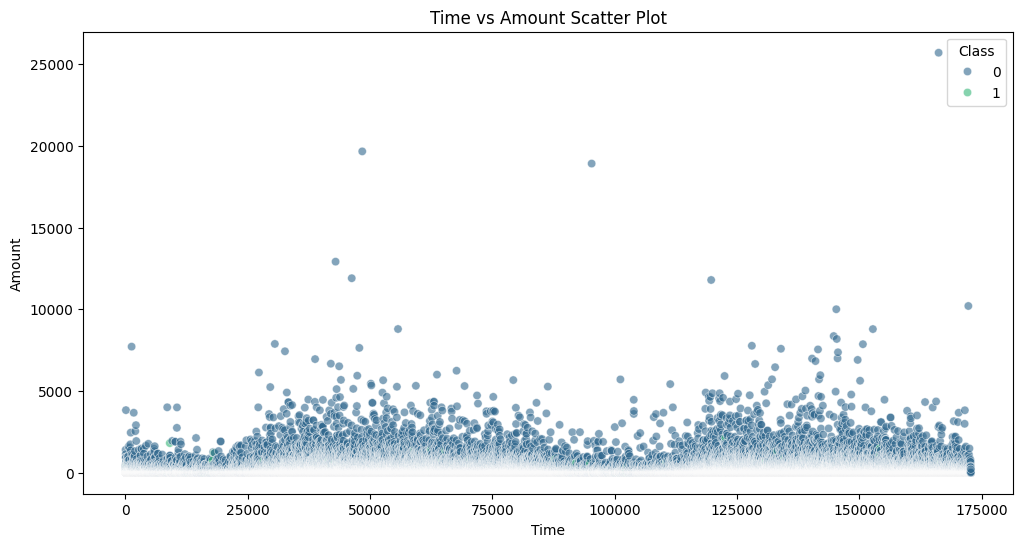

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Time', y='Amount', hue='Class', palette='viridis', alpha=0.6)
plt.title('Time vs Amount Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()

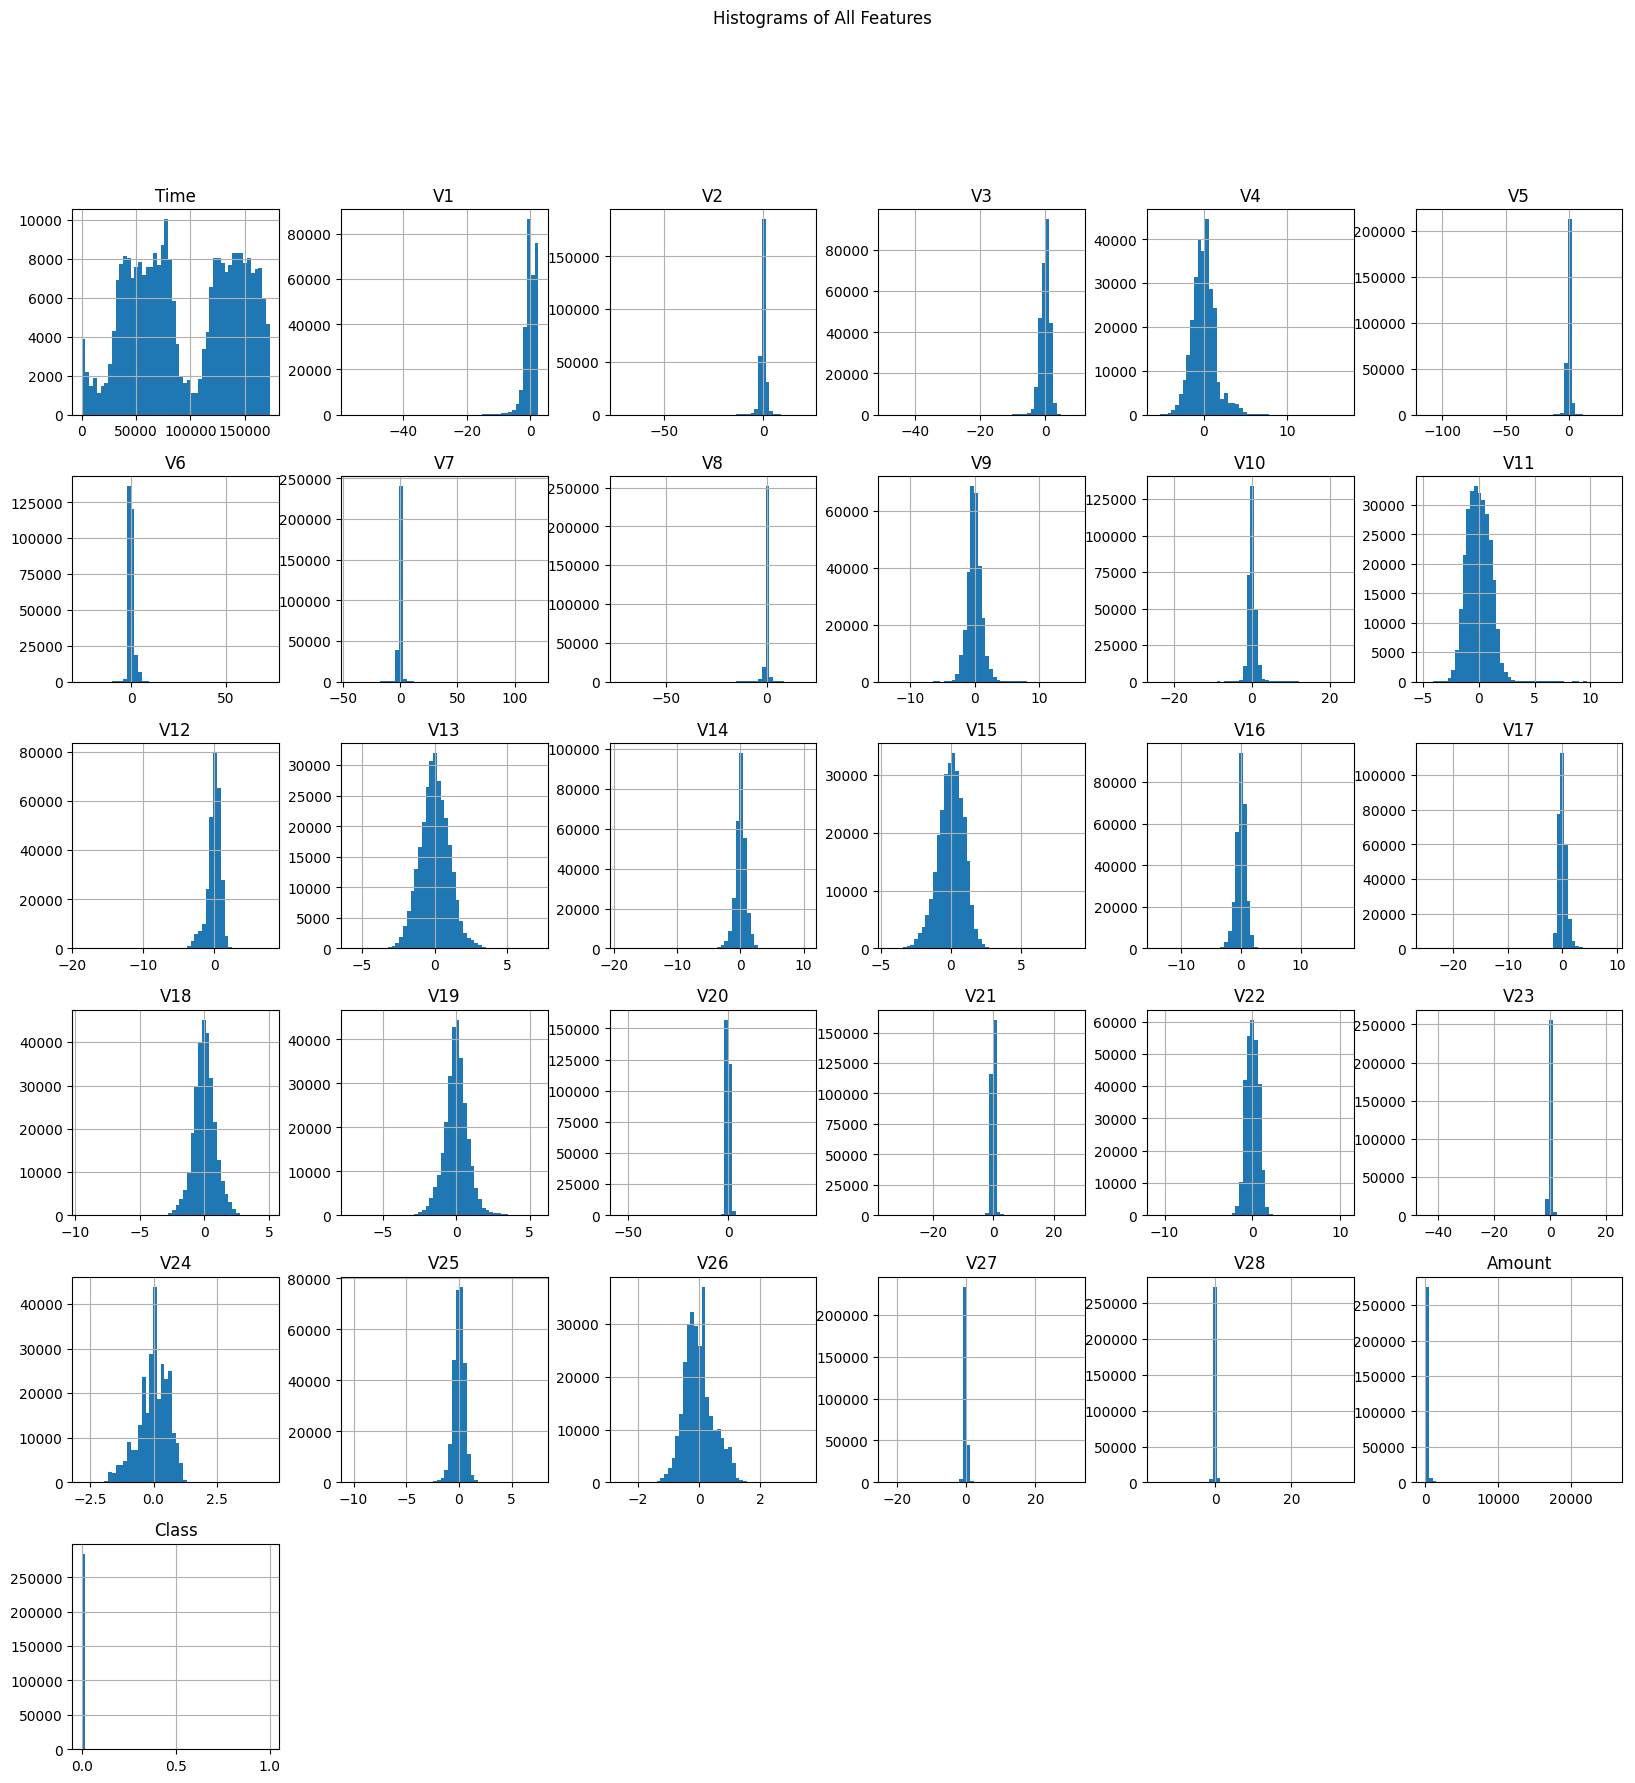

In [ ]:
data.hist(figsize=(20, 20), bins=50)
plt.suptitle('Histograms of All Features')
plt.show()

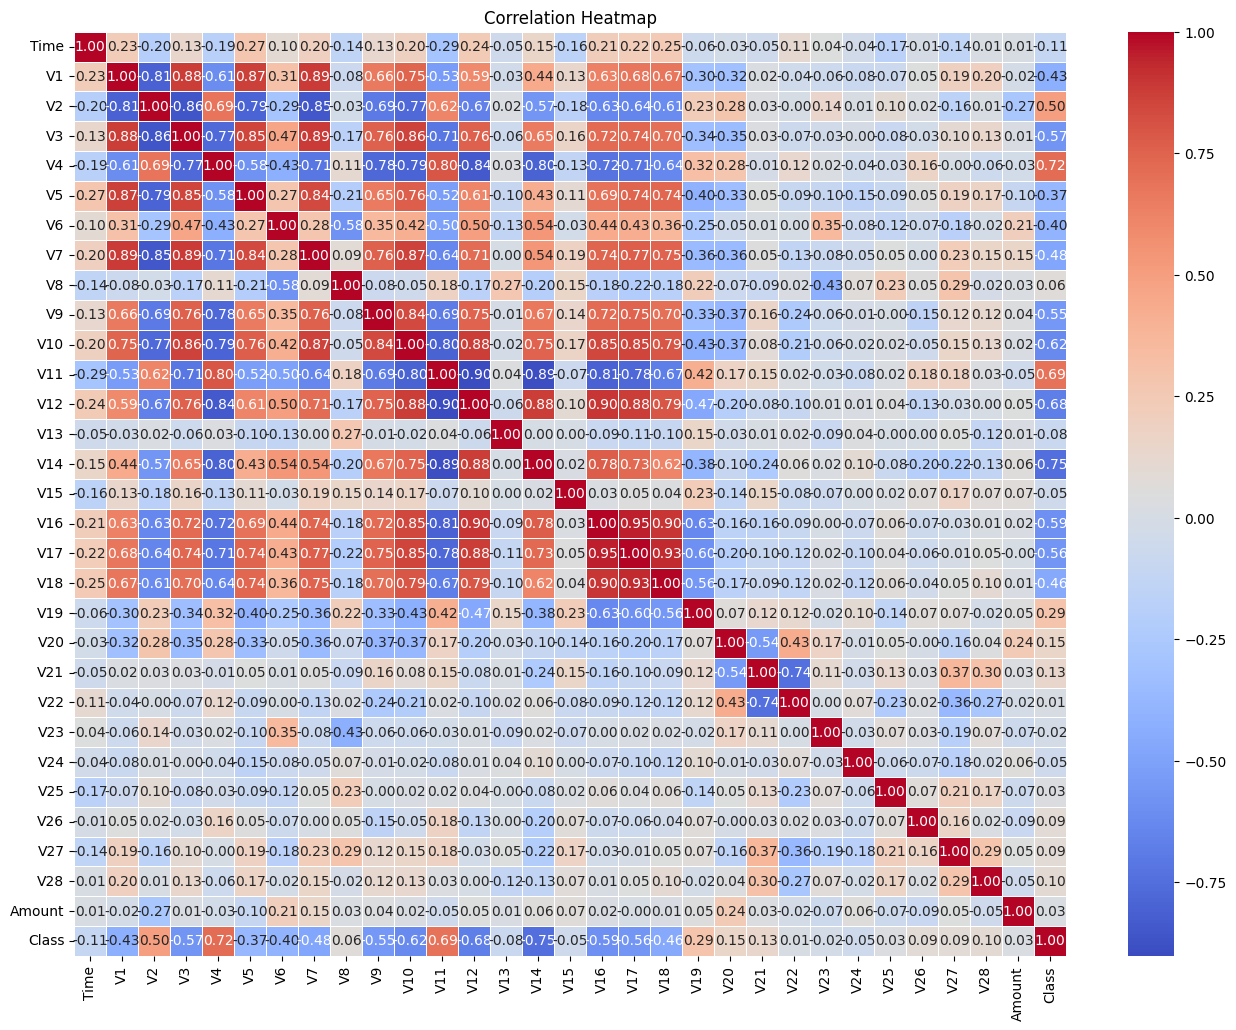

In [ ]:
plt.figure(figsize=(16, 12))
correlation_matrix = new_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# ML Model Prediction

By analysis the complexity of data based on various aspects like number of features, their varying scales, distribution of numerical features and the labels of categorical features, we can come to the conclusion that certain ML models may fit well to this dataset and predict target variable with high accuracy.
1. `Logistic Regression`


`class` target feature and it is of categorical nature.

## ML Model fitting

### Train-test split

In [ ]:
X = new_data.drop(columns='Class', axis=1)
y = new_data['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Prediction and Evaluation

In [ ]:
prediction = model.predict(X_test)

### Making the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
confu_mat = confusion_matrix(y_test, prediction)
print(confu_mat)
accuracy_score(y_test, prediction)

[[97  2]
 [11 87]]


0.934010152284264

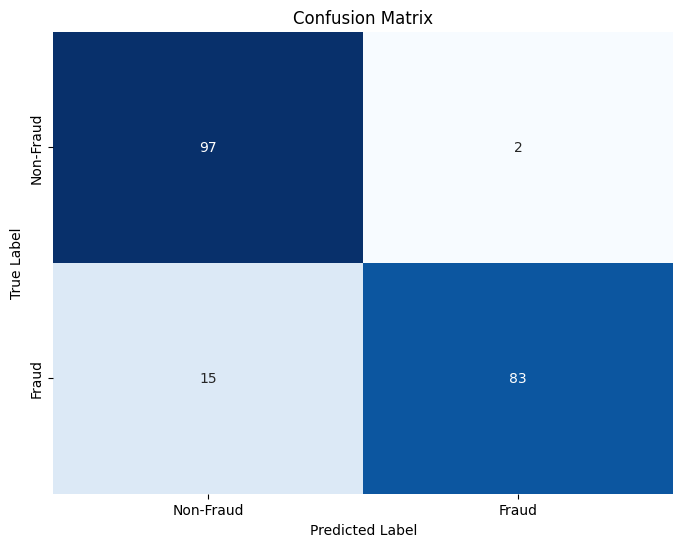

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confu_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()